# Image Operations

In [1]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)

# Reference a specific pixel
px = img[55,55]
print([px])
# array is the color values for the pixel

# Modify the pixel
img[55,55] = [255,255,255] # -> white
print(img[55,55])

[array([31, 29, 41], dtype=uint8)]
[255 255 255]


In [2]:
# ROI: Region of Image
roi = img[100:150, 100:150]
print(roi)
img[100:150, 100:150] = [255,255,255]
print(img[100:150, 100:150])

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 51  43  54]
  [ 52  42  54]
  [ 54  42  54]
  ...
  [ 38  40  48]
  [ 32  34  42]
  [ 27  29  37]]

 [[ 51  43  54]
  [ 52  42  54]
  [ 53  41  53]
  ...
  [ 46  48  56]
  [ 63  65  73]
  [ 51  53  61]]

 [[ 52  44  55]
  [ 52  42  54]
  [ 53  40  54]
  ...
  [ 68  68  74]
  [ 79  79  85]
  [ 73  73  79]]

 ...

 [[ 27  36  50]
  [ 28  37  51]
  [ 31  39  52]
  ...
  [116 121 136]
  [119 124 139]
  [124 129 144]]

 [[ 26  35  49]
  [ 27  36  50]
  [ 28  36  49]
  ...
  [109 115 134]
  [109 115 134]
  [106 113 130]]

 [[ 26  35  49]
  [ 25  34  48]
  [ 26  34  47]
  ...
  [111 118 138]
  [110 117 137]
  [104 111 130]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

In [3]:
watch_face = img[37:111, 107:194]
img[0:74, 0:87] = watch_face # -> have to be same size to execute
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Arithmetics and Logic

In [4]:
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')

add = img1 + img2
cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Build-in function cv2.add()
add = cv2.add(img1, img2)
# this function just add all the pixel together
# -> (155,211,79) + (50,170,200) = 205, 381, 279 translated to (205,255,255)

cv2.imshow('add', add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0) # 0 -> gamma (alone)

cv2.imshow('weighted', weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

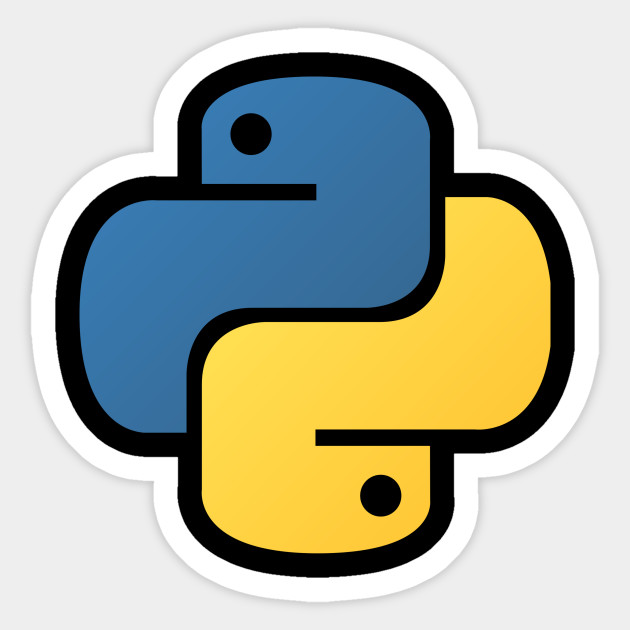

In [3]:
from PIL import Image
Image.open('mainlogo.jpg')

In [7]:
img1 = cv2.imread("3D-Matplotlib-Example.png")
img = cv2.imread("mainlogo.jpg")

# put the logo on the top-left corner
rows,cols,channels = img.shape
roi = img1[0:rows, 0:cols]

# create a mask of the logo
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
# if above 220 -> 255 (white), below 220 -> black; binary: 0-1

mask_invisible = cv2.bitwise_not(mask) # bitwise_not - low level logical operation (means NOT)
img1_background = cv2.bitwise_and(roi, roi, mask=mask_invisible)
img_foreground = cv2.bitwise_and(img, img, mask=mask)

dst = cv2.add(img1_background, img_foreground)
img1[0:rows, 0:cols] = dst

cv2.imshow('res', img1)
# The whole process is to make a TRANSPARENT BACKGROUND for the "mainlogo" image

cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding

In [2]:
# extreme simplication of an image
img = cv2.imread('bookpage.jpg')

retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)

cv2.imshow('threshold2', threshold2)
cv2.imshow('orginal', img)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Gaussian Adaptive Threshold
gaus = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)


# Otsu option
retval3, otsu = cv2.threshold(grayscaled, 125,  255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('gaus', gaus)
cv2.imshow('otsu', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()